# Localised Regression charts

## Set-up

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# local import
import plotting
from common import ATTITUDINAL, VOTING_INTENTION, ensure
from data_capture import retrieve

In [3]:
plt.style.use("fivethirtyeight")
SHOW = True

## Get data

In [4]:
data = retrieve()
ensure(data, "You must run the data capture notebook every day.")

In [5]:
# Double check that our voting intention data has been normalized ...
# Ideally, this cell will show nothing is wrong.

checkable = "Primary", "2pp"
vi = data[VOTING_INTENTION]
for check in checkable:
    columns = [c for c in vi.columns if check in c and "Other" not in c]
    check_these = vi[columns]
    row_sum = check_these.sum(axis=1)
    fail = check_these[(row_sum > 100.01) | (row_sum < 99.99)].copy()
    if len(fail):
        fail["TOTAL"] = row_sum
        display(fail)

,2pp vote ALP,2pp vote L/NP,TOTAL
104,NaN,NaN,0.0


In [6]:
# Amalgamate the ONP, UAP and OTH columns
vi = plotting.amalgamate_other(data[VOTING_INTENTION])

# let's look at the Primary Vote column names ...
[x for x in vi.columns if "Primary vote" in x]

['Primary vote L/NP',
 'Primary vote ALP',
 'Primary vote GRN',
 'Primary vote ONP',
 'Primary vote UAP',
 'Primary vote OTH',
 'Primary vote Other']

## And plot

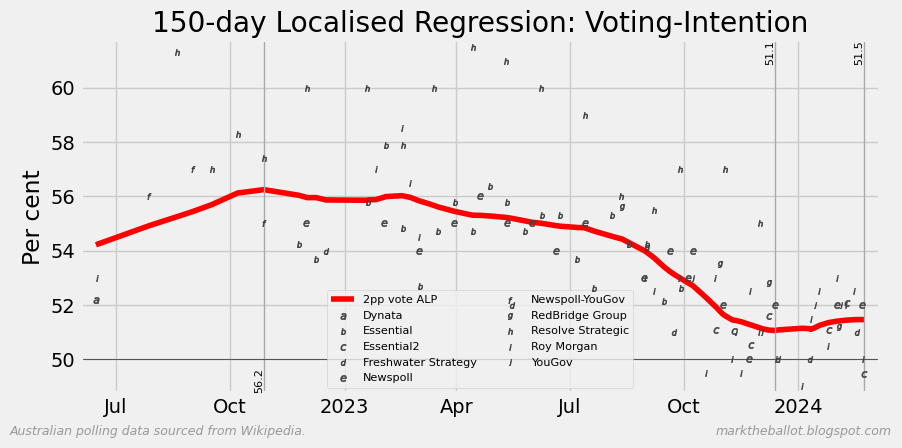

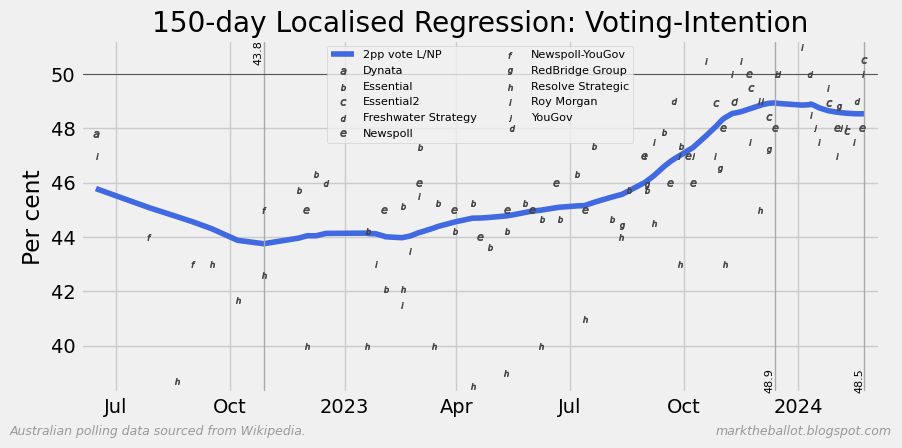

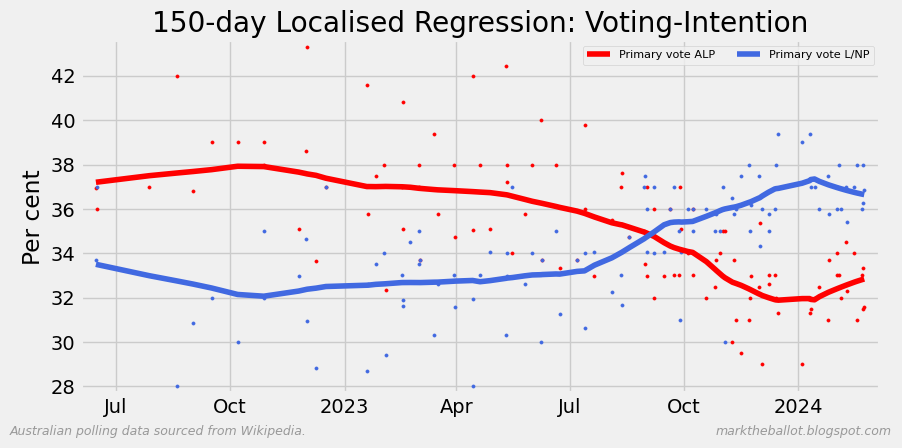

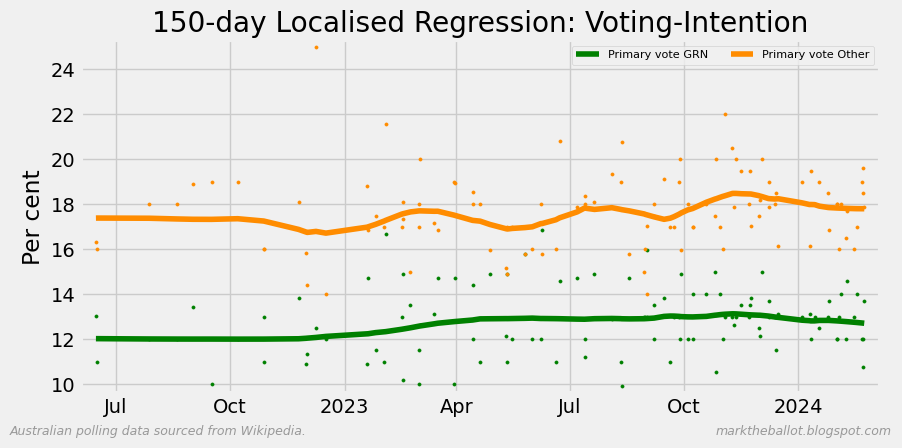

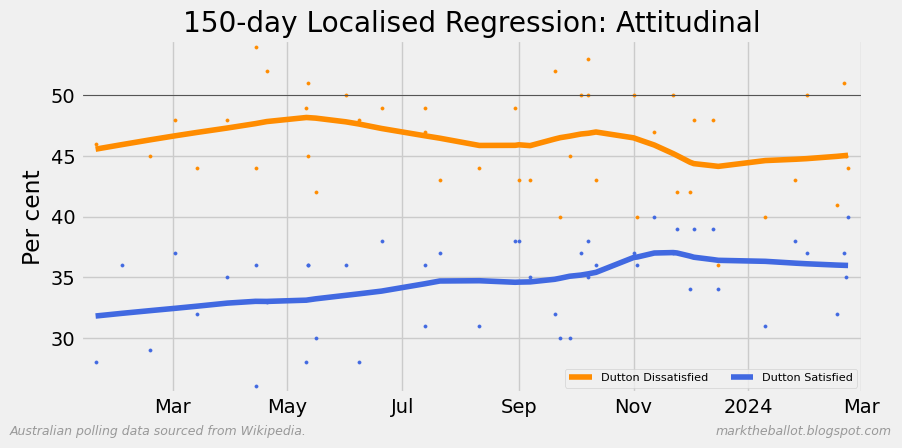

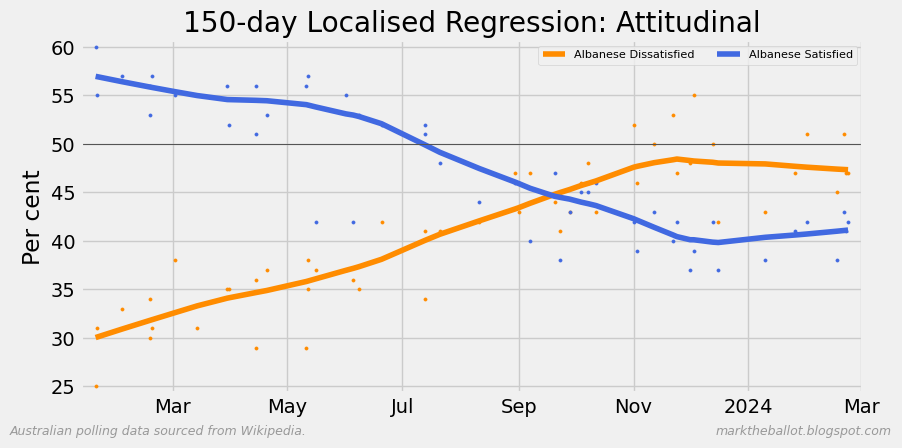

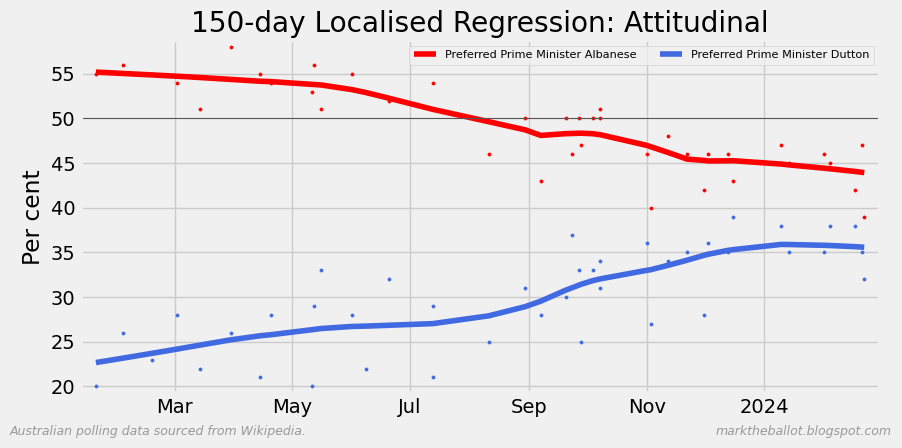

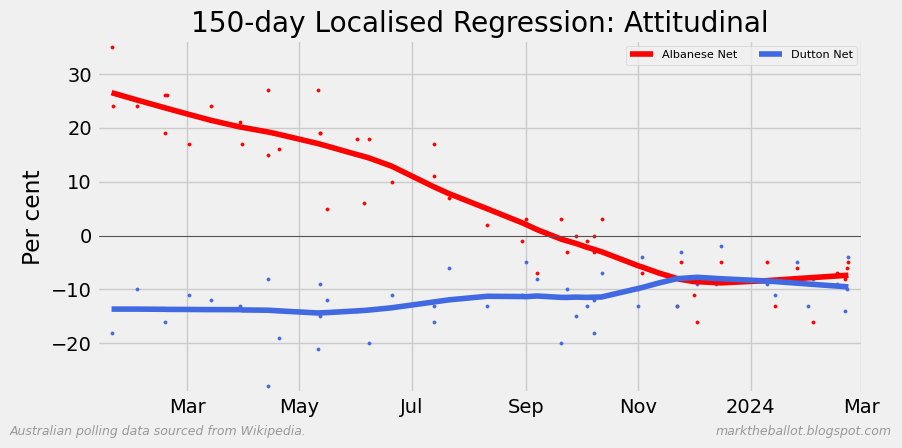

In [7]:
# what we will plot ...
plotable = {
    VOTING_INTENTION: [
        # regex patterns for matching desired columns
        r"2pp vote ALP",
        r"2pp vote L/NP",
        r"Primary vote (L/NP|ALP)",
        r"Primary vote (GRN|Other)",
    ],
    ATTITUDINAL: [
        # regex patterns for matching desired columns
        r"^Dutton (Satisfied|Dissatisfied)",
        r"^Albanese (Satisfied|Dissatisfied)",
        r"Preferred Prime Minister (Dutton|Albanese)",
        r"(Dutton|Albanese) Net",
    ],
}

plotting.plot_loess(data, plotable, show=SHOW)

## Finished

In [8]:
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Tue Feb 27 2024 09:07:11

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.22.1

pandas    : 2.2.1
matplotlib: 3.8.3

Watermark: 2.4.3



In [9]:
print("Finished")

Finished
